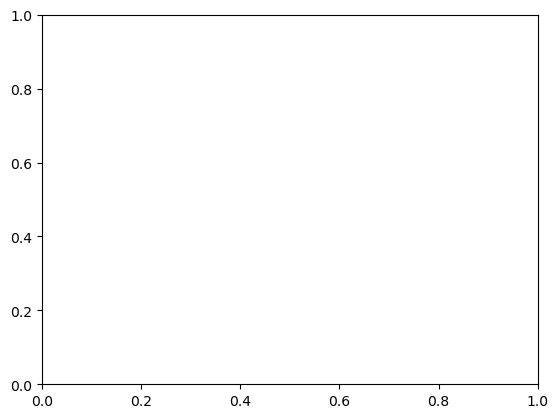

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

In [6]:
totalcarn = 2**6
length = totalcarn*5
amplitude = 0.001
alpha = 2*np.pi/totalcarn 
r = length/(2*np.pi)
background = np.linspace(0, 2*np.pi, 100)

In [7]:
def deltaxfunction(length, function_name):
    
    delta = np.diff(function_name)
    delta = np.append(delta, function_name[0]+length-function_name[-1])
    
    return delta

In [15]:
x = np.linspace(0, length, totalcarn, endpoint=False)
idealdeltax = x[1]-x[0]
v = np.full(totalcarn, np.tanh(idealdeltax-2)+np.tanh(2))
theorysense = 2*(1/np.cosh(np.array(idealdeltax)-2)**2)/(np.cos(alpha/2)**2)

coefficient = -0.01
sense = theorysense + coefficient
perturbe = 0.001*np.sin(x)

x = x+perturbe
simulationtime = 0
while simulationtime < 504001:

    deltax = deltaxfunction(length, x)
    dt = np.min(deltax/v)*0.01

    k1x = v
    k1v = sense * (np.tanh(deltax-2)+np.tanh(2) - v)
    k2x = v + (dt * k1v * 0.5)
    k2v = sense * (np.tanh(deltaxfunction(length, x+(0.5*dt*k1x))-2)+np.tanh(2) - (v+(0.5*dt*k1v)))
    k3x = v + (dt * k2v * 0.5)
    k3v = sense * (np.tanh(deltaxfunction(length, x+(0.5*dt*k2x))-2)+np.tanh(2) - (v+(0.5*dt*k2v)))
    k4x = v + (dt * k3v)
    k4v = sense * (np.tanh(deltaxfunction(length, x+(dt*k3x))-2)+np.tanh(2) - (v+(dt*k3v)))
    x += dt*(k1x+2*k2x+2*k3x+k4x)/6
    v += dt*(k1v+2*k2v+2*k3v+k4v)/6
    
    if simulationtime > 460000:
        if simulationtime % 10 == 0:
            theta = (x%length)/r
            ax.cla()
            ax.axis('equal')
            ax.plot(r*np.cos(background), r*np.sin(background), 'b-')
            ax.plot(r*np.cos(theta), r*np.sin(theta), color='r', marker = 'o', linestyle='None')
            fig.savefig('./fig/plot_{}.png'.format(simulationtime))
    
    simulationtime += 1
    
    
        
        




In [9]:
plt.show()